In [1]:
#Importing libraries
import numpy as np   #to store image
import pandas as pd
import matplotlib.pyplot as plt
import cv2   #for image processing
import easygui #to open filebox
import imageio  #to read image stored in a particular path
import sys
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

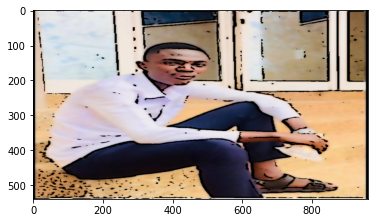

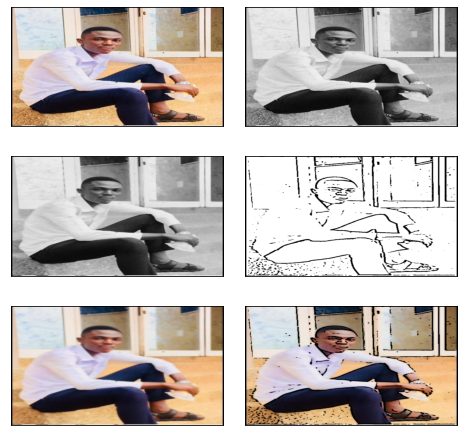

In [2]:
#building filebox
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

def cartoonify(ImagePath):
    #read the image
    originalImage=cv2.imread(ImagePath)
    originalImage=cv2.cvtColor(originalImage,cv2.COLOR_BGR2RGB)
    #print the image... image is stored in the form of numbers
    
    #to confirm that image is chosen
    if originalImage is None:
        print("Cannot find the image. Choose appropriate file")
        sys.exit()
    ReSized1=cv2.resize(originalImage,(960,540))
        
    plt.imshow(ReSized1,cmap="gray")

    #converting image to grayscale
    grayScaleImage=cv2.cvtColor(originalImage,cv2.COLOR_BGR2GRAY)
    ReSized2=cv2.resize(grayScaleImage,(960,540))
    plt.imshow(ReSized2,cmap="gray")
    
    #smoothening grayscale image
    #applying median blur
    smoothGrayScale=cv2.medianBlur(grayScaleImage,5)
    ReSized3=cv2.resize(smoothGrayScale,(960,540))
    plt.imshow(ReSized3,cmap="gray")
    
    #Retrieving the edges of image
    getEdge=cv2.adaptiveThreshold(smoothGrayScale,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,9)
    ReSized4=cv2.resize(getEdge,(960,540))
    plt.imshow(ReSized4,cmap="gray")
    
    #applying bilateral filter to remove noise
    colorImage=cv2.bilateralFilter(originalImage,9,300,300)
    ReSized5=cv2.resize(colorImage,(960,540))
    plt.imshow(ReSized5,cmap="gray")
    
    #beautifying image
    cartoonImage=cv2.bitwise_and(colorImage,colorImage,mask=getEdge)
    ReSized6=cv2.resize(cartoonImage,(960,540))
    plt.imshow(ReSized6,cmap="gray")
    
    #plotting all transitions
    images=[ReSized1,ReSized2,ReSized3,ReSized4,ReSized5,ReSized6]
    fig, axes=plt.subplots(3,2,figsize=(8,8),subplot_kw={"xticks":[], "yticks":[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i],cmap="gray")
    #// save button
    plt.show()
    
    #Making save button in main window
    save1=Button(top,text="Save Cartoon Image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background="blue", foreground="white",font=("calibri"))
    save1.pack(side=TOP,pady=50)

    #functionality of save button
def save(ReSized6, ImagePath):
    newName="cartoonified_Image"
    path1=os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path=os.path.join(path1, newName+extension)
    cv2.imwrite(path,cv2.cvtColor(ReSized6,cv2.COLOR_RGB2BGR))
    I="Image saved by name "+newName +" at "+path

    tk.messagebox.showinfo(title=None,message=I)
        
    #making the window
top=tk.Tk()
top.geometry("400x400")
top.title("Cartoonify your image")
top.configure(background="white")
label=Label(top,background="green", font=("calibri",20,"bold"))

upload=Button(top,text="Cartoonify Image", command=upload,padx=10,pady=10)
upload.configure(background="black", foreground="white",font=("calibri"))
upload.pack(side=TOP,pady=50)

top.mainloop()